In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

This is code for simple GP regression. It assumes a zero mean GP Prior. Modified from code written by Nando de Freitas for CPSC 540 (Machine Learning) at the University of British Columbia.

Recall definition of a squared exponential kernel:
$\kappa~(x, x') = \exp\{-\frac{1}{2 \lambda}{||x-x'||_2^2}\}$

In [3]:
# Define the kernel
# Exercise: try implementing one of the kernels at http://www.cs.toronto.edu/~duvenaud/cookbook/index.html
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1 # corresponds to lambda above
    # Efficient calculation of squared l2 distance between each entry of a and b:
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

Let's generate some toy data. This is the true unknown function we are trying to approximate

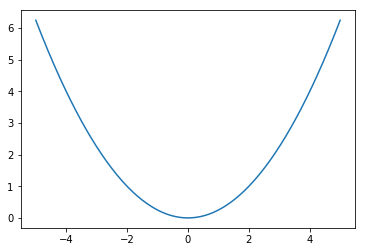

In [4]:
#f = lambda x: np.sin(0.9*x).flatten()
f = lambda x: (0.25*(x**2)).flatten()
dom = np.linspace(-5,5,500).reshape(-1,1)
pl.plot(dom, f(dom))

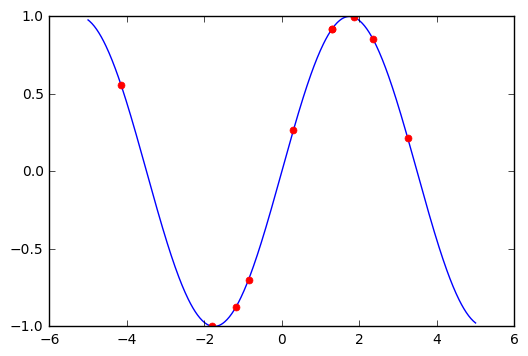

In [7]:
N = 10      # number of training points.
n = 500       # number of test points.
s = 0.0005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)
K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))
pl.plot(dom, f(dom))
pl.plot(X, y, 'r.', markersize=10)

Points we're going to make predictions at:

In [8]:
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

Compute the mean at our test points. See Bishop sec. 6.4 for theory.

In [9]:
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

Now compute the variance at our test points.

In [10]:
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

Visualize the mean and variance of the learned Gaussian Process:

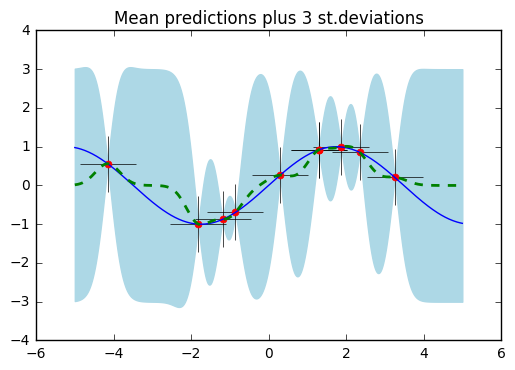

In [11]:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'k+', ms=40)
pl.plot(X, y, 'r.', ms=10)
pl.plot(Xtest, f(Xtest), '-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="lightblue")
pl.plot(Xtest, mu, '--', lw=2)
pl.title('Mean predictions plus 3 st.deviations')

Visualize the prior and posterior of the Gaussian Process:

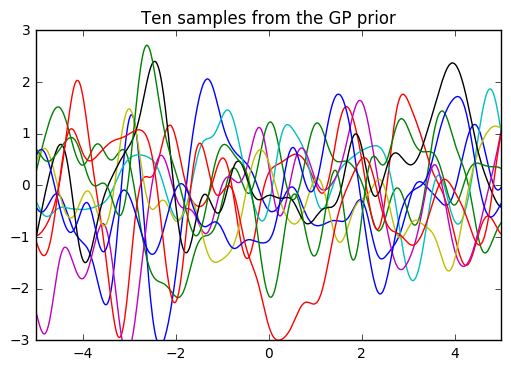

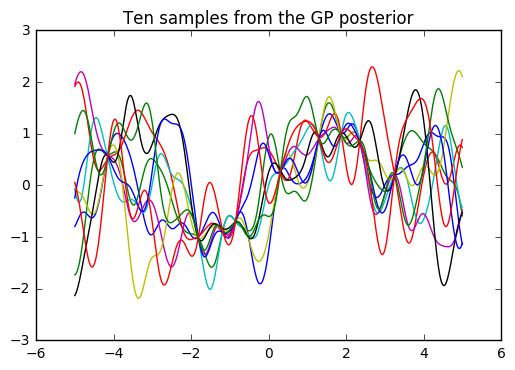

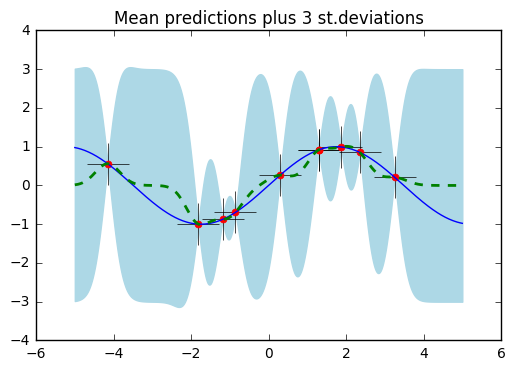

In [13]:
n_samples = 10

# draw samples from the prior
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,n_samples)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')

# draw n_samples functions from the posterior
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,n_samples)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')

pl.figure(4)
pl.plot(X, y, 'k+', ms=30)
pl.plot(X, y, 'r.', ms=10)
pl.plot(Xtest, f(Xtest), '-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="lightblue")
pl.plot(Xtest, mu, '--', lw=2)
pl.title('Mean predictions plus 3 st.deviations')